# Data Selection & Overview

I am useing data from freeCodeCamp's 2017 New Coder Survey. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. I am using an existing survey rather than conducting our own in order to save money on the initial analysis.

Survey data is taken from this GitHub repository: https://github.com/freeCodeCamp/2017-new-coder-survey

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Show all columns with more than 5 000 not Null values

for i in data.columns:
    if data[i].notna().sum() > 5000:
        print(i, data[i].notna().sum())  

Age 15367
AttendedBootcamp 17709
CityPopulation 15354
CommuteTime 9246
CountryCitizen 15382
CountryLive 15336
EmploymentField 8116
EmploymentStatus 14345
ExpectedEarning 7200
Gender 15454
HasDebt 15291
HasFinancialDependents 15329
HasHighSpdInternet 15380
HasHomeMortgage 6397
HasServedInMilitary 15256
HasStudentDebt 6402
HoursLearning 16714
ID.x 18175
ID.y 15743
Income 7623
IsEthnicMinority 15293
IsReceiveDisabilitiesBenefits 15222
IsSoftwareDev 18068
IsUnderEmployed 9223
JobApplyWhen 8138
JobPref 13483
JobRelocateYesNo 6503
JobRoleInterest 6992
JobWherePref 8118
LanguageAtHome 15344
MaritalStatus 15335
MoneyForLearning 16577
MonthsProgramming 17084
NetworkID 18175
Part1EndTime 18175
Part1StartTime 18175
Part2EndTime 15743
Part2StartTime 15743
ResourceCodecademy 9390
ResourceFCC 13803
ResourceMDN 6417
ResourceSO 11207
ResourceUdemy 5120
ResourceW3S 9765
SchoolDegree 15368
SchoolMajor 8727
YouTubeFCC 6036


# Relevant columns

We've determined the columns we want to analize. These are:

ID - unique number of a respondent
CountryLive - a country where he lives
MonthsProgramming - how long in months a person is learning programming
MoneyForLearning - how much money a person has already spent on learning
JobRoleInterest - which programming jobs the person is interested in

In [6]:
relevant_data = data[['ID.x',
                      'CountryLive',
                      'MonthsProgramming',
                      'MoneyForLearning',
                      'JobRoleInterest'
                     ]].copy()
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 5 columns):
ID.x                 18175 non-null object
CountryLive          15336 non-null object
MonthsProgramming    17084 non-null float64
MoneyForLearning     16577 non-null float64
JobRoleInterest      6992 non-null object
dtypes: float64(2), object(3)
memory usage: 710.0+ KB


# Dropping rows without job interest

In [7]:
relevant_data = relevant_data[relevant_data['JobRoleInterest'].notnull()]
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Data columns (total 5 columns):
ID.x                 6992 non-null object
CountryLive          6838 non-null object
MonthsProgramming    6633 non-null float64
MoneyForLearning     6476 non-null float64
JobRoleInterest      6992 non-null object
dtypes: float64(2), object(3)
memory usage: 327.8+ KB


# Dropping rows with nulls

In [8]:
relevant_data.dropna(axis=0, inplace=True)
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 5 columns):
ID.x                 6212 non-null object
CountryLive          6212 non-null object
MonthsProgramming    6212 non-null float64
MoneyForLearning     6212 non-null float64
JobRoleInterest      6212 non-null object
dtypes: float64(2), object(3)
memory usage: 291.2+ KB


# Renaming Columns

In [9]:
relevant_data.rename(columns = {'ID.x': 'id',
                                'CountryLive': 'country',
                                'MonthsProgramming': 'months_programming',
                                'MoneyForLearning': 'money_for_learning',
                                'JobRoleInterest': 'job_interest'},
                     inplace = True)
relevant_data.head(2)

,id,country,months_programming,money_for_learning,job_interest
1,5bfef9ecb211ec4f518cfc1d2a6f3e0c,United States of America,6.0,80.0,Full-Stack Web Developer
2,14f1863afa9c7de488050b82eb3edd96,United States of America,5.0,1000.0,"Front-End Web Developer, Back-End Web Develo..."


# Exploring Job Interest

In [10]:
relevant_data['job_interest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                       11.799742
  Front-End Web Developer                                                                                                                                                       6.423052
  Data Scientist                                                                                                                                                                2.189311
Back-End Web Developer                                                                                                                                                          1.996137
Game Developer                                                                                                                                                                  1.625885
  Mobile Developer                                                         

# Deviding Job Interest

In [11]:
jobs = relevant_data['job_interest'].str.split(',', expand = True).copy()

splited_db = pd.concat([relevant_data, jobs], axis=1)
splited_db.info()
splited_db.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 18 columns):
id                    6212 non-null object
country               6212 non-null object
months_programming    6212 non-null float64
money_for_learning    6212 non-null float64
job_interest          6212 non-null object
0                     6212 non-null object
1                     4263 non-null object
2                     3590 non-null object
3                     2602 non-null object
4                     1650 non-null object
5                     904 non-null object
6                     471 non-null object
7                     225 non-null object
8                     118 non-null object
9                     56 non-null object
10                    30 non-null object
11                    20 non-null object
12                    2 non-null object
dtypes: float64(2), object(16)
memory usage: 922.1+ KB


,id,country,months_programming,money_for_learning,job_interest,0,1,2,3,4,5,6,7,8,9,10,11,12
1,5bfef9ecb211ec4f518cfc1d2a6f3e0c,United States of America,6.0,80.0,Full-Stack Web Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None,None,None,None,None
2,14f1863afa9c7de488050b82eb3edd96,United States of America,5.0,1000.0,"Front-End Web Developer, Back-End Web Develo...",Front-End Web Developer,Back-End Web Developer,DevOps / SysAdmin,Mobile Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None
3,91756eb4dc280062a541c25a3d44cfb0,Brazil,5.0,0.0,"Front-End Web Developer, Full-Stack Web Deve...",Front-End Web Developer,Full-Stack Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None,None,None
4,aa3f061a1949a90b27bef7411ecd193f,Portugal,24.0,0.0,"Full-Stack Web Developer, Information Security...",Full-Stack Web Developer,Information Security,Mobile Developer,Front-End Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None
6,5e130f133306abd6c2f9af31467ff37c,United Kingdom,12.0,0.0,Full-Stack Web Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None,None,None,None,None


# Deleting initial job column in the merged db

In [12]:
splited_db.drop('job_interest', axis=1, inplace=True)
splited_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 17 columns):
id                    6212 non-null object
country               6212 non-null object
months_programming    6212 non-null float64
money_for_learning    6212 non-null float64
0                     6212 non-null object
1                     4263 non-null object
2                     3590 non-null object
3                     2602 non-null object
4                     1650 non-null object
5                     904 non-null object
6                     471 non-null object
7                     225 non-null object
8                     118 non-null object
9                     56 non-null object
10                    30 non-null object
11                    20 non-null object
12                    2 non-null object
dtypes: float64(2), object(15)
memory usage: 873.6+ KB


# Melting

In [13]:
melted_db = splited_db.melt(id_vars = ['id',
                                       'country', 
                                       'months_programming',
                                       'money_for_learning'],
                            value_vars = [0,1,2,3,4,5,6,7,8,9,10,11,12]                 
                            )
melted_db = melted_db[melted_db['value'].notnull()]
melted_db.rename(columns = {'variable': 'mention_num'}, inplace=True)
melted_db.info()
melted_db.sort_values('id', ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20143 entries, 0 to 80755
Data columns (total 6 columns):
id                    20143 non-null object
country               20143 non-null object
months_programming    20143 non-null float64
money_for_learning    20143 non-null float64
mention_num           20143 non-null object
value                 20143 non-null object
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


,id,country,months_programming,money_for_learning,mention_num,value
6803,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,1,Full-Stack Web Developer
19227,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,3,Data Scientist
591,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,0,Back-End Web Developer
13015,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,2,Data Engineer
52506,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,8,Mobile Developer
33870,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,5,Back-End Web Developer
27658,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,4,Information Security
2810,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,0,Quality Assurance Engineer
15234,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,2,Data Scientist
9022,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,1,DevOps / SysAdmin


# Cleaning

In [14]:
melted_db['value'].value_counts().head(15)

 Full-Stack Web Developer      2228
   Front-End Web Developer     2046
 Back-End Web Developer        1810
Full-Stack Web Developer       1555
   Mobile Developer            1531
  Front-End Web Developer      1105
 Game Developer                1028
   Data Scientist               995
   User Experience Designer     966
 Information Security           873
 Data Engineer                  838
Back-End Web Developer          686
   DevOps / SysAdmin            633
   Product Manager              531
  Mobile Developer              500
Name: value, dtype: int64

get rid the whitespaces, because that's too much

In [15]:
melted_db['value'] = melted_db['value'].str.strip()

In [16]:
melted_db['value'].value_counts()

Full-Stack Web Developer                                                                     3783
Front-End Web Developer                                                                      3151
Back-End Web Developer                                                                       2496
Mobile Developer                                                                             2031
Data Scientist                                                                               1460
Game Developer                                                                               1441
User Experience Designer                                                                     1306
Information Security                                                                         1165
Data Engineer                                                                                1108
DevOps / SysAdmin                                                                             838
Product Manager     

grouping jobs with less that 10 mentions to "Others"

In [17]:
frequencies = melted_db['value'].value_counts().head(12)
job_list = list(frequencies.index)
job_list

['Full-Stack Web Developer',
 'Front-End Web Developer',
 'Back-End Web Developer',
 'Mobile Developer',
 'Data Scientist',
 'Game Developer',
 'User Experience Designer',
 'Information Security',
 'Data Engineer',
 'DevOps / SysAdmin',
 'Product Manager',
 'Quality Assurance Engineer']

In [18]:
frequencies = melted_db['value'].value_counts().head(12)
job_list = list(frequencies.index)
job_list

['Full-Stack Web Developer',
 'Front-End Web Developer',
 'Back-End Web Developer',
 'Mobile Developer',
 'Data Scientist',
 'Game Developer',
 'User Experience Designer',
 'Information Security',
 'Data Engineer',
 'DevOps / SysAdmin',
 'Product Manager',
 'Quality Assurance Engineer']

In [19]:
melted_db['value'] = melted_db['value'].apply(lambda x: x if x in job_list else 'Others')

In [20]:
(melted_db['value'].value_counts(normalize=True) * 100).head(20)

Full-Stack Web Developer      18.780718
Front-End Web Developer       15.643151
Back-End Web Developer        12.391401
Mobile Developer              10.082907
Data Scientist                 7.248176
Game Developer                 7.153850
User Experience Designer       6.483642
Information Security           5.783647
Data Engineer                  5.500670
DevOps / SysAdmin              4.160254
Product Manager                3.564514
Quality Assurance Engineer     2.149630
Others                         1.057439
Name: value, dtype: float64

# Analizing job interests

In [21]:
(melted_db[melted_db['mention_num'] < 3]['value'].value_counts(normalize=True) * 100).head(20)

Full-Stack Web Developer      20.988269
Front-End Web Developer       16.885887
Back-End Web Developer        12.264486
Mobile Developer               9.662282
Data Scientist                 7.095627
Game Developer                 7.017419
User Experience Designer       6.142908
Information Security           5.311056
Data Engineer                  4.820476
DevOps / SysAdmin              3.618912
Product Manager                3.448276
Quality Assurance Engineer     1.770352
Others                         0.974049
Name: value, dtype: float64

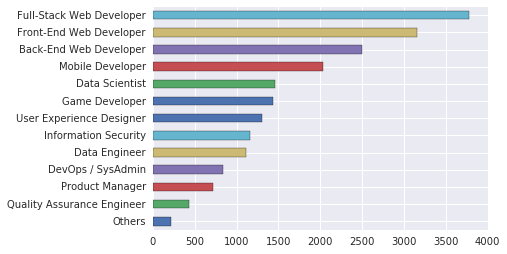

In [22]:
melted_db['value'].value_counts().sort_values().plot.barh()
plt.show()

# Finding the best countries

In [23]:
relevant_data['country'].value_counts().head(10)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Germany                      114
Brazil                       111
Australia                    102
Ukraine                       79
Russia                        79
Name: country, dtype: int64

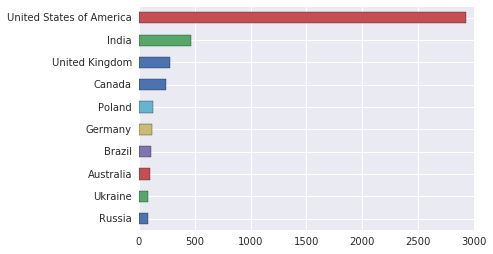

In [24]:
relevant_data['country'].value_counts().sort_values().tail(10).plot.barh()
plt.show()

# Top 4 Countries

In [27]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
relevant_data = relevant_data[relevant_data['country'].isin(countries)]
relevant_data['country'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: country, dtype: int64

# Cleaning "months programming"

In [28]:
print(relevant_data['months_programming'].isnull().sum())
print((relevant_data['months_programming'] == 0).sum())

0
146


In [29]:
relevant_data.loc[(relevant_data['months_programming'] == 0), 'months_programming'] = 1

In [30]:
print(relevant_data['months_programming'].isnull().sum())
print((relevant_data['months_programming'] == 0).sum())

0
0


# Calculating money per month

In [31]:
relevant_data['spent_per_month'] = relevant_data['money_for_learning'] / relevant_data['months_programming']

In [32]:
print(relevant_data['spent_per_month'].isnull().sum())
(relevant_data['spent_per_month'] == 0).sum()

0


1844

In [33]:
relevant_data_without_zeroes = relevant_data[relevant_data['spent_per_month'] != 0]
relevant_data_with_zeroes = relevant_data[relevant_data['spent_per_month'].notnull()]

In [34]:
relevant_data_with_zeroes['country'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: country, dtype: int64

In [35]:
relevant_data_without_zeroes['country'].value_counts().head()

United States of America    1619
India                        201
United Kingdom               137
Canada                       114
Name: country, dtype: int64

# Analizing Results

In [36]:
relevant_data_with_zeroes.groupby('country')['spent_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.0
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,80000.0


In [37]:
relevant_data_without_zeroes.groupby('country')['spent_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Canada,114.0,238.970444,617.345854,0.416667,8.333333,25.000000,131.250000,5000.0
India,201.0,311.202759,1026.728280,0.138889,5.500000,20.000000,133.333333,10000.0
United Kingdom,137.0,92.730727,222.359671,0.050000,8.333333,20.833333,66.666667,1400.0
United States of America,1619.0,413.043929,2597.175174,0.033333,10.000000,33.333333,166.666667,80000.0


In [38]:
means_with_zeroes = relevant_data_with_zeroes.groupby('country')['spent_per_month'].mean()
means_without_zeroes = relevant_data_without_zeroes.groupby('country')['spent_per_month'].mean()

pd.DataFrame(data = {'Means_with_zeroes': means_with_zeroes,
                     'Means_without_zeroes': means_without_zeroes})

,Means_with_zeroes,Means_without_zeroes
country,,
Canada,113.510961,238.970444
India,135.100982,311.202759
United Kingdom,45.534443,92.730727
United States of America,227.997996,413.043929


In [39]:
medians_with_zeroes = relevant_data_with_zeroes.groupby('country')['spent_per_month'].median()
medians_without_zeroes = relevant_data_without_zeroes.groupby('country')['spent_per_month'].median()

pd.DataFrame(data = {'Medians_with_zeroes': medians_with_zeroes,
                     'Medians_without_zeroes': medians_without_zeroes})

,Medians_with_zeroes,Medians_without_zeroes
country,,
Canada,0.000000,25.000000
India,0.000000,20.000000
United Kingdom,0.000000,20.833333
United States of America,3.333333,33.333333


# Managing outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



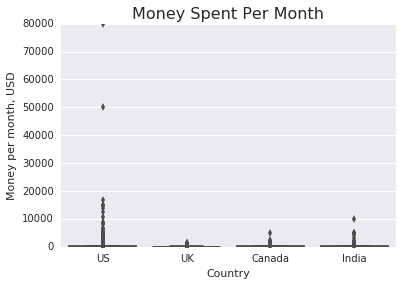

In [40]:
sns.boxplot(x = 'country',
            y = 'spent_per_month', 
            data = relevant_data_without_zeroes)
plt.title('Money Spent Per Month',fontsize = 16)
plt.ylabel('Money per month, USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])
plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



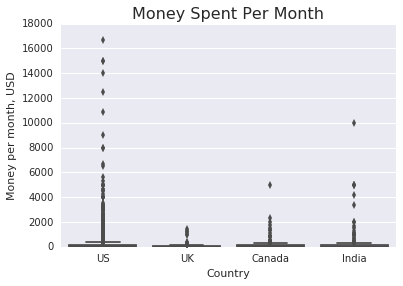

In [41]:
sns.boxplot(x = 'country',
            y = 'spent_per_month', 
            data = relevant_data_without_zeroes[relevant_data_without_zeroes['spent_per_month']<20000])
plt.title('Money Spent Per Month',fontsize = 16)
plt.ylabel('Money per month, USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])
plt.show()

In [42]:
condition = (relevant_data_without_zeroes['spent_per_month'] > 20) & (relevant_data_without_zeroes['spent_per_month'] < 200)

In [43]:
print(relevant_data_without_zeroes.shape[0])
relevant_data_without_zeroes[condition].shape[0]

2071


774

# Visualizing money spent per month

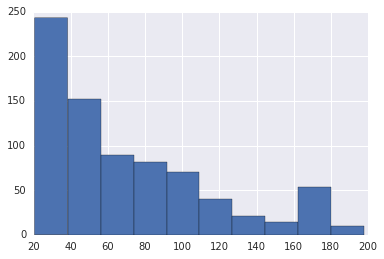

In [44]:
relevant_data_without_zeroes[condition]['spent_per_month'].hist()
plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



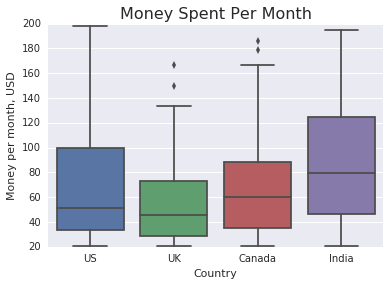

In [45]:
sns.boxplot(x = 'country',
            y = 'spent_per_month', 
            data = relevant_data_without_zeroes[condition])
plt.title('Money Spent Per Month',fontsize = 16)
plt.ylabel('Money per month, USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])
plt.show()

# Making the result table

In [46]:
medians = relevant_data_without_zeroes[condition].groupby('country')['spent_per_month'].median()
means = relevant_data_without_zeroes[condition].groupby('country')['spent_per_month'].mean()
num_respondents = relevant_data_without_zeroes[condition]['country'].value_counts()
results_df = pd.DataFrame(data = {'Median': medians,
                                  'Mean': means,
                                  'Num_respondents': num_respondents})
results_df

,Mean,Median,Num_respondents
Canada,58.502976,45.833333,40
India,88.939039,79.916667,62
United Kingdom,69.128001,60.000000,55
United States of America,68.857456,51.111111,617


rounding the value means

In [49]:
results_df.drop(columns = 'Median', inplace = True)
results_df['Mean'] = round((results_df['Mean']),0).astype('int')

ValueError: labels ['Median'] not contained in axis

In [50]:
results_df.reset_index(inplace=True)
results_df

,index,Mean,Num_respondents
0,Canada,59,40
1,India,89,62
2,United Kingdom,69,55
3,United States of America,69,617
